### 3) Vector Error Correction Model 


The reason for choosing VECM is because it imposes restrictions due to the existence of non-stationary but co-integrated data forms. The model utilizes the co integration restriction information into its specifications, after this specification is applied into the fitting of the model, we can then interpret the long term and short term equations using the error correction model. The coefficient estimates for the short and long term relationship is more efficient in using the VECM than using VAR (Vector Autoregressive Model). This makes the prediction of a cointegrated time series more robust by removing any signal in the model and extracting the error term as the determinant for the forecast of price movement [19]. 

Another reason for using VECM, as we discussed earlier, all three time series are unit root non stationary with cointegration. This extension of the unit root concept to multiple time series means that a linear combination of two or more series is stationary. VAR is not equipped to handle this case without differencing the original time series, which in the process you may risk losing the long term relationship from the data. Using VECM will allow us to analyze and test for the dependencies between the non-stationary variables which may exhibit a long term equilibrium without having to difference the original time series. 

In [7]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.vector_ar.vecm import VECM

In [67]:
dff_transformed = dff.diff().dropna()

dff_transformed.shape

(217855, 3)

In [37]:
# splitting the dataset
n_obs = 30000

x_train, x_test = dff_transformed[0:n_obs], dff_transformed[n_obs:40000]

In [38]:
x_train.shape

(30000, 3)

In [39]:
x_test.shape

(10000, 3)

In [40]:
x_train.index = pd.DatetimeIndex(x_train.index).to_period('1min')

In [64]:
#model = vecm.select_order(x_train, maxlags=10)

#model.summary()

In [43]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank


In [14]:
rank1 = select_coint_rank(x_train, det_order=1, k_ar_diff=3,
                         method='trace', signif=0.01)

print(rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          43.66          41.08
  1   3          14.29          23.15
-------------------------------------


In [15]:
#rank test using Johansen Cointegration, to determine the number of co integration relationships

rank1 = select_coint_rank(x_train, det_order=1, k_ar_diff=3,
                         method='maxeig', signif=0.01)

print(rank1.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          29.37          29.26
  1   2          9.194          21.75
-------------------------------------


In [44]:
vecm = VECM(x_train, k_ar_diff=1, coint_rank=3, deterministic='ci')

vecm_fit = vecm.fit()
vecm_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.XETUSD Curncy,0.0231,0.011,2.095,0.036,0.001,0.045
L1.XBNUSD Curncy,-0.1617,0.056,-2.889,0.004,-0.271,-0.052
L1.XBTUSD Curncy,0.0013,0.001,1.398,0.162,-0.001,0.003
,coef,std err,z,P>|z|,[0.025,0.975]
L1.XETUSD Curncy,-0.0017,0.001,-1.220,0.222,-0.005,0.001
L1.XBNUSD Curncy,0.0573,0.007,7.965,0.000,0.043,0.071
L1.XBTUSD Curncy,-6.52e-05,0.000,-0.525,0.599,-0.000,0.000
,coef,std err,z,P>|z|,[0.025,0.975]
L1.XETUSD Curncy,-0.0038,0.124,-0.031,0.975,-0.247,0.240
L1.XBNUSD Curncy,-1.7705,0.631,-2.805,0.005,-3.007,-0.534


In [45]:
vecm_fit.predict(steps=10)

array([[-2.60739846e-02, -1.40226056e-03,  3.11326178e-02],
       [-2.92804347e-02, -5.12094281e-05, -4.26485906e-02],
       [-5.90263046e-03, -1.65465851e-03, -1.28152104e-01],
       [-9.01987287e-03, -1.63345456e-03, -1.57691328e-01],
       [-9.42873925e-03, -1.52122944e-03, -1.53703159e-01],
       [-9.12702925e-03, -1.53160414e-03, -1.50151451e-01],
       [-9.14625207e-03, -1.53708641e-03, -1.50613455e-01],
       [-9.16603328e-03, -1.53583192e-03, -1.50873202e-01],
       [-9.16216758e-03, -1.53567210e-03, -1.50817792e-01],
       [-9.16125673e-03, -1.53577702e-03, -1.50804591e-01]])

In [46]:
forecast, lower, upper = vecm_fit.predict(10000, 0.05)
print('lower bounds of confidence intervals:')
print(lower.round(3))
print('\npoint forecasts:')
print(forecast.round(3))
print('\nupper bounds of confidence intervals:')
print(upper.round(3))

lower bounds of confidence intervals:
[[ -4.69   -0.601 -52.565]
 [ -4.759  -0.6   -53.64 ]
 [ -4.736  -0.603 -53.75 ]
 ...
 [ -4.74   -0.602 -53.782]
 [ -4.74   -0.602 -53.782]
 [ -4.74   -0.602 -53.782]]

point forecasts:
[[-0.026 -0.001  0.031]
 [-0.029 -0.    -0.043]
 [-0.006 -0.002 -0.128]
 ...
 [-0.009 -0.002 -0.151]
 [-0.009 -0.002 -0.151]
 [-0.009 -0.002 -0.151]]

upper bounds of confidence intervals:
[[ 4.638  0.599 52.627]
 [ 4.7    0.6   53.554]
 [ 4.725  0.599 53.494]
 ...
 [ 4.722  0.599 53.48 ]
 [ 4.722  0.599 53.48 ]
 [ 4.722  0.599 53.48 ]]


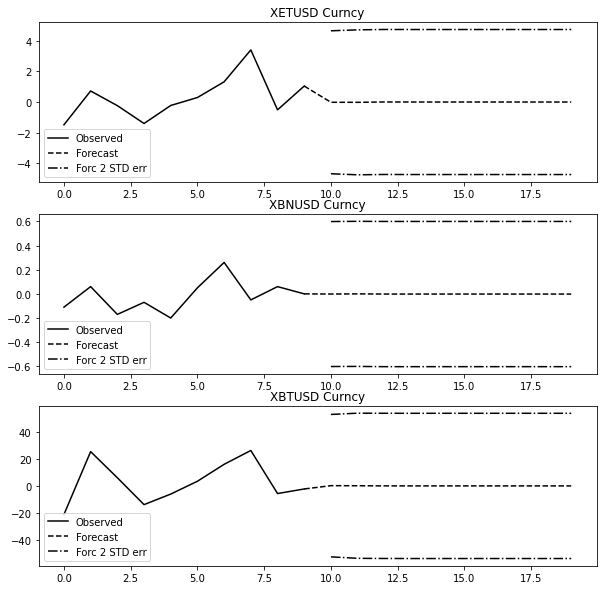

In [47]:
vecm_fit.plot_forecast(steps=10, n_last_obs=10)

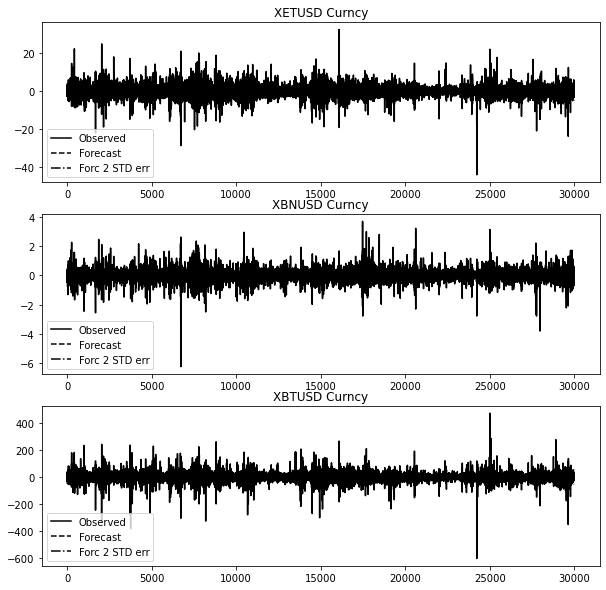

In [48]:
vecm_fit.plot_forecast(steps=10, plot_conf_int=True)

In [281]:
# residual autocorrelation 

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(vecm_fit.resid)
for col, val in zip(x_train.columns, out):
    print((col), ':', round(val, 2))

XETUSD Curncy : 2.0
XBNUSD Curncy : 2.0
XBTUSD Curncy : 2.0


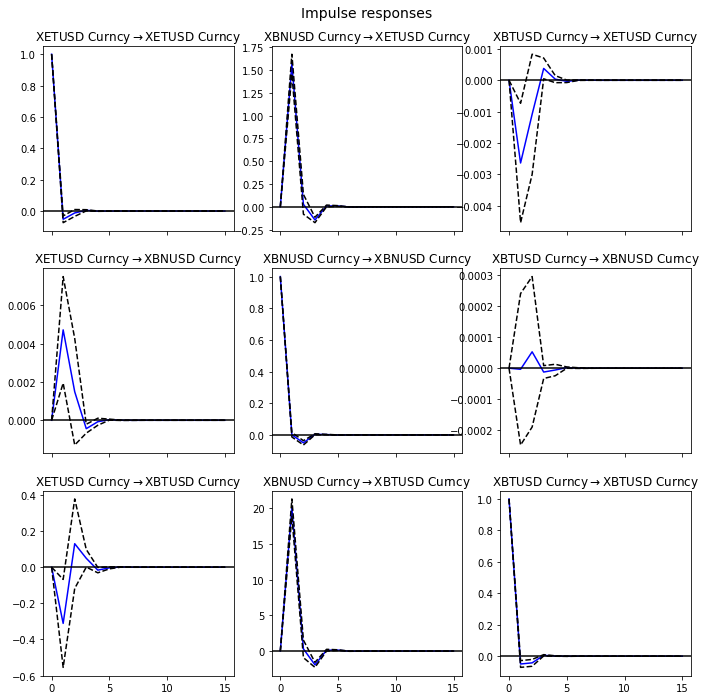

In [49]:
from statsmodels.tsa.vector_ar import irf
from matplotlib import pyplot as plt
irf = vecm_fit.irf(15)
irf.plot(orth = False)
plt.show()

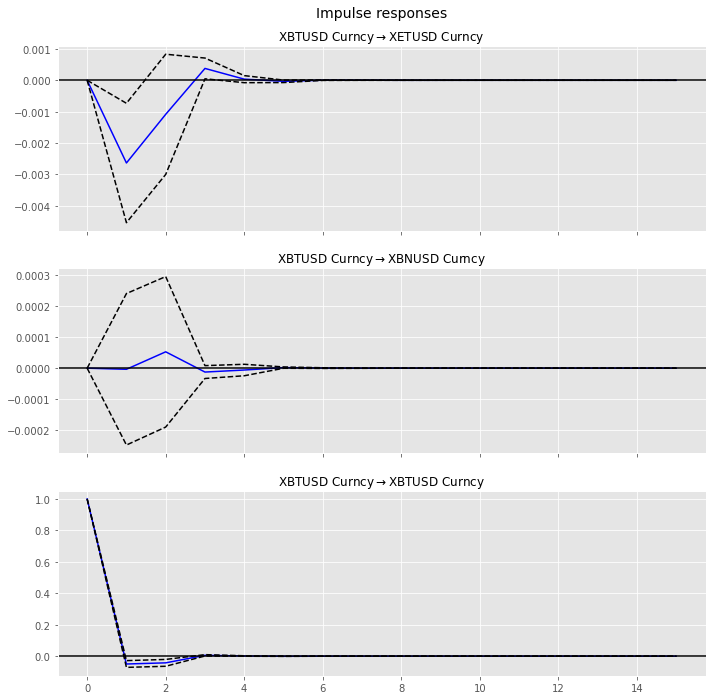

In [50]:
#XETUSD Curncy, XBNUSD Curncy, XBTUSD Curncy


plt.style.use('ggplot')
irf.plot(impulse='XBTUSD Curncy')
plt.show()

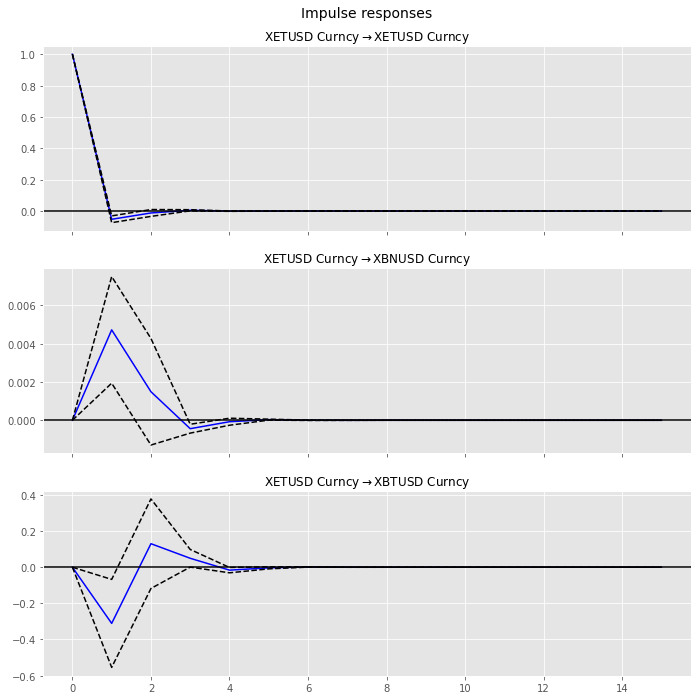

In [51]:
plt.style.use('ggplot')
irf.plot(impulse='XETUSD Curncy')
plt.show()

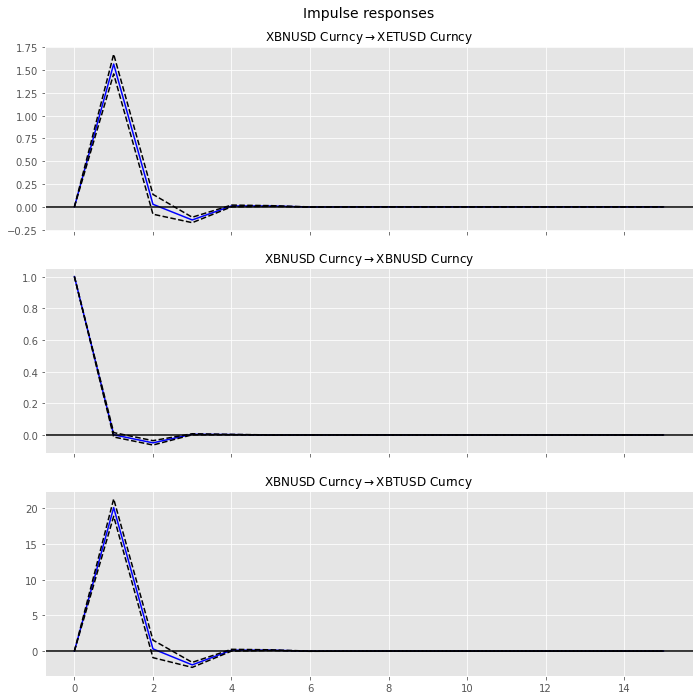

In [52]:
plt.style.use('ggplot')
irf.plot(impulse='XBNUSD Curncy')
plt.show()

In [53]:
from pandas import DataFrame, merge, concat

In [54]:
# prediction 
#XETUSD Curncy, XBNUSD Curncy, XBTUSD Curncy

pd.options.display.float_format = "{:.2f}".format
forecast = DataFrame(forecast, index= x_test.index, columns= x_test.columns)
forecast.rename(columns = {'XETUSD Curncy':'eth_pred', 'XBNUSD Curncy':'bnb_pred', 
                           'XBTUSD Curncy':'btc_pred'}, inplace = True)
forecast

,eth_pred,bnb_pred,btc_pred
Dates,,,
2022-04-22 05:24:00,-0.03,-0.00,0.03
2022-04-22 05:25:00,-0.03,-0.00,-0.04
2022-04-22 05:26:00,-0.01,-0.00,-0.13
2022-04-22 05:27:00,-0.01,-0.00,-0.16
2022-04-22 05:28:00,-0.01,-0.00,-0.15
...,...,...,...
2022-04-29 04:06:00,-0.01,-0.00,-0.15
2022-04-29 04:07:00,-0.01,-0.00,-0.15
2022-04-29 04:08:00,-0.01,-0.00,-0.15


In [2]:
#combine = concat([x_test, forecast], axis=1)

#pred = combine[['XETUSD Curncy','eth_pred', 'XBNUSD Curncy','bnb_pred', 
                #'XBTUSD Curncy','btc_pred']]

#def highlight_cols(s):
    #color = 'yellow'
    #return 'background-color: %s' % color

#pred.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['eth_pred', 'bnb_pred', 'btc_pred']])

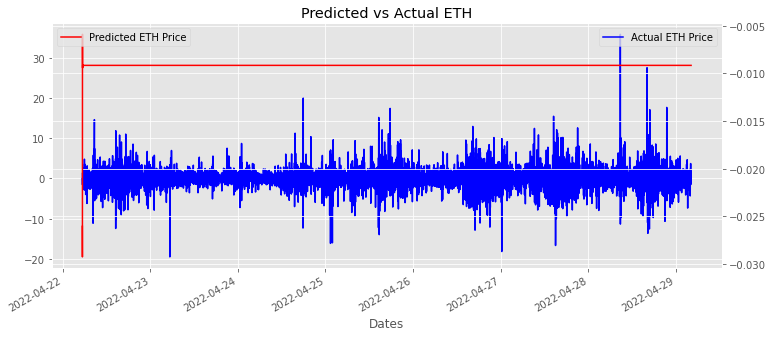

In [58]:
plt.figure(figsize=(12,5))
plt.xlabel('Dates')

ax1 = combine['XETUSD Curncy'].plot(color='blue', grid=True, label='Actual ETH Price')
ax2 = combine['eth_pred'].plot(color='red', grid=True, secondary_y=True, label='Predicted ETH Price')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.title('Predicted vs Actual ETH')

plt.show()

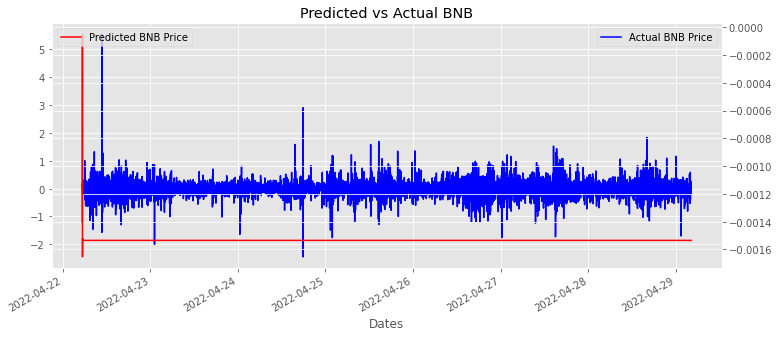

In [59]:
plt.figure(figsize=(12,5))
plt.xlabel('Dates')

ax1 = combine['XBNUSD Curncy'].plot(color='blue', grid=True, label='Actual BNB Price')
ax2 = combine['bnb_pred'].plot(color='red', grid=True, secondary_y=True, label='Predicted BNB Price')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.title('Predicted vs Actual BNB')

plt.show()

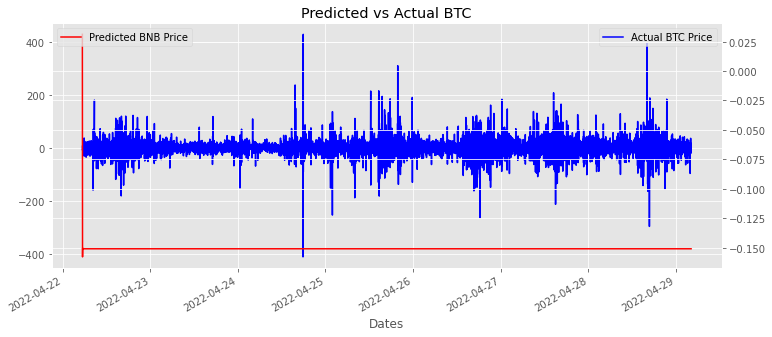

In [60]:
plt.figure(figsize=(12,5))
plt.xlabel('Dates')

ax1 = pred['XBTUSD Curncy'].plot(color='blue', grid=True, label='Actual BTC Price')
ax2 = pred['btc_pred'].plot(color='red', grid=True, secondary_y=True, label='Predicted BNB Price')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.title('Predicted vs Actual BTC')

plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#score for eth 

mae = mean_absolute_error(pred['XETUSD Curncy'], pred['eth_pred'])
mse = mean_squared_error(pred['XETUSD Curncy'], pred['eth_pred'])
rmse = np.sqrt(mse)
sum = DataFrame(index = ['Mean Absolute Error', 'Mean squared error', 'Root mean squared error'])
sum['Accuracy metrics :    ETH'] = [mae, mse, rmse]


# score for bnb 
mae = mean_absolute_error(pred['XBNUSD Curncy'], pred['bnb_pred'])
mse = mean_squared_error(pred['XBNUSD Curncy'], pred['bnb_pred'])
rmse = np.sqrt(mse)
sum['BNB'] = [mae, mse, rmse]

# score for btc 
mae = mean_absolute_error(pred['XBTUSD Curncy'], pred['btc_pred'])
mse = mean_squared_error(pred['XBTUSD Curncy'], pred['btc_pred'])
rmse = np.sqrt(mse)
sum['BTC'] = [mae, mse, rmse]

sum

,Accuracy metrics : ETH,BNB,BTC
Mean Absolute Error,1.52,0.17,17.74
Mean squared error,5.56,0.07,852.96
Root mean squared error,2.36,0.26,29.21
